<a href="https://colab.research.google.com/github/nauliaimtk02/Nur-Aulia-Imtinan/blob/main/Analisis_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Nur Aulia Imtinan\
Nim : 2430209040007\
Matkul : Analisis Regresi

TUGAS 1\
Buat analisis korelasi lengkap. Muat dataset eksternal (misalnya, .csv) dengan beberapa
variabel, pilih beberapa pasang variabel yang relevan, hitung koefisien korelasi Pearson
untuk pasangan tersebut. Visualisasikan korelasi dengan scatterplot informatif (misalnya,
dengan garis regresi). Lakukan uji hipotesis korelasi untuk korelasi terkuat dan berikan
interpretasi mendalam mengenai jenis, kekuatan, signifikansi, implikasi praktis, serta
batasan (termasuk korelasi vs. kausalitas) dari hasil analisis.

Data

In [3]:
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
df = pd.read_csv("dataset_analisis_korelasi_500.csv",sep=";")

# Menghapus spasi di awal & akhir nama kolom
df.columns = df.columns.str.strip()

#Membuat Matriks Korelasi
data = df[["Umur", "Pendapatan", "Jam_Kerja", "Pengeluaran"]]
print(data.corr())


                 Umur  Pendapatan  Jam_Kerja  Pengeluaran
Umur         1.000000    0.940558   0.650283     0.829231
Pendapatan   0.940558    1.000000   0.630236     0.875050
Jam_Kerja    0.650283    0.630236   1.000000     0.548318
Pengeluaran  0.829231    0.875050   0.548318     1.000000


koefisien korelasi Pearson

In [4]:
#Uji Koefesien Korelasi Pearson beberapa variabel
def uji_korelasi(df, var1, var2):
    from scipy.stats import pearsonr

    r, p = pearsonr(df[var1], df[var2])

    print(f"\nUji Korelasi: {var1} vs {var2}")
    print(f"r = {r:.3f}")
    print(f"p-value = {p:.5f}")

    alpha = 0.05
    if p < alpha:
        print("Keputusan: Tolak H0 (Signifikan)")
    else:
        print("Keputusan: Tidak signifikan")

    # Interpretasi kekuatan
    if r > 0.8:
        interpretasi = "Korelasi sangat kuat positif"
    elif r > 0.6:
        interpretasi = "Korelasi kuat positif"
    elif r > 0.4:
        interpretasi = "Korelasi sedang positif"
    elif r > 0.2:
        interpretasi = "Korelasi lemah positif"
    elif r > 0:
        interpretasi = "Korelasi sangat lemah positif"
    elif r < -0.8:
        interpretasi = "Korelasi sangat kuat negatif"
    elif r < -0.6:
        interpretasi = "Korelasi kuat negatif"
    elif r < -0.4:
        interpretasi = "Korelasi sedang negatif"
    elif r < -0.2:
        interpretasi = "Korelasi lemah negatif"
    elif r < 0:
        interpretasi = "Korelasi sangat lemah negatif"
    else:
        interpretasi = "Tidak ada korelasi linier"

    print("Interpretasi:", interpretasi)

    # Tambahan: jika sangat kuat, tampilkan pernyataan lanjut uji
    if abs(r) > 0.8:
        print(f"\nKarena hasil r pada {var1} vs {var2} termasuk kategori sangat kuat,")
        print("maka korelasi ini dipilih untuk dianalisis lebih lanjut.")

# Contoh pemanggilan
uji_korelasi(df, "Umur", "Pendapatan")
uji_korelasi(df, "Pendapatan","Jam_Kerja")
uji_korelasi(df, "Jam_Kerja","Pengeluaran")



Uji Korelasi: Umur vs Pendapatan
r = 0.941
p-value = 0.00000
Keputusan: Tolak H0 (Signifikan)
Interpretasi: Korelasi sangat kuat positif

Karena hasil r pada Umur vs Pendapatan termasuk kategori sangat kuat,
maka korelasi ini dipilih untuk dianalisis lebih lanjut.

Uji Korelasi: Pendapatan vs Jam_Kerja
r = 0.630
p-value = 0.00000
Keputusan: Tolak H0 (Signifikan)
Interpretasi: Korelasi kuat positif

Uji Korelasi: Jam_Kerja vs Pengeluaran
r = 0.548
p-value = 0.00000
Keputusan: Tolak H0 (Signifikan)
Interpretasi: Korelasi sedang positif


Scatterplot Korelasi

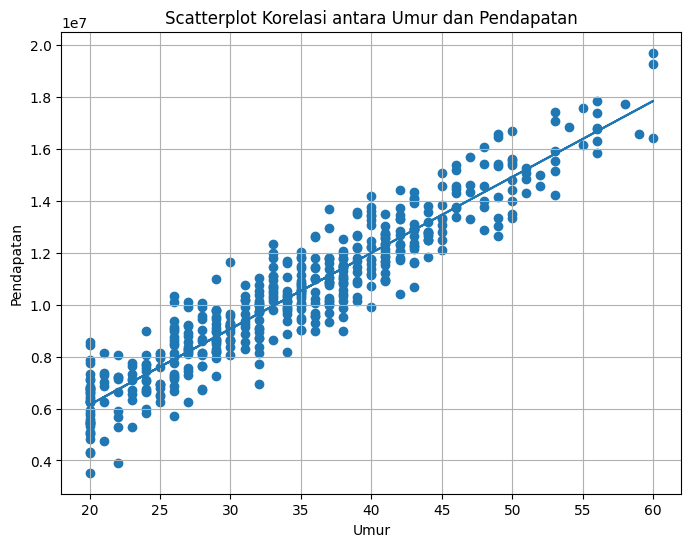

In [5]:
# Tentukan variabel yang mau diplot
x = df["Umur"]
y = df["Pendapatan"]

plt.figure(figsize=(8, 6))
plt.scatter(x, y)

# Tambahkan garis regresi
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

# Label otomatis sesuai variabel
plt.xlabel("Umur")
plt.ylabel("Pendapatan")
plt.title("Scatterplot Korelasi antara Umur dan Pendapatan")
plt.grid(True)

plt.show()

Uji Hipotesis Korelasi

In [6]:
# Hitung koefisien korelasi Pearson dan p-value
korelasi_pearson, p_value = pearsonr(x, y)

# Tetapkan tingkat signifikansi (alpha)
alpha = 0.05

print(f"Koefisien Korelasi Pearson: {korelasi_pearson:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Tingkat Signifikansi (alpha): {alpha}")

# Lakukan uji hipotesis
if p_value < alpha:
    keputusan = "Tolak Hipotesis Nol (H0)"
    interpretasi_uji = "Ada bukti statistik yang cukup untuk menyimpulkan adanya hubungan linier yang signifikan antara Variabel X dan Variabel Y dalam populasi."
else:
    keputusan = "Gagal Menolak Hipotesis Nol (H0)"
    interpretasi_uji = "Tidak ada bukti statistik yang cukup untuk menyimpulkan adanya hubungan linier yang signifikan antara Variabel X dan Variabel Y dalam populasi."

print(f"\nKeputusan: {keputusan}")
print(f"Interpretasi Uji: {interpretasi_uji}")

Koefisien Korelasi Pearson: 0.941
P-value: 0.000
Tingkat Signifikansi (alpha): 0.05

Keputusan: Tolak Hipotesis Nol (H0)
Interpretasi Uji: Ada bukti statistik yang cukup untuk menyimpulkan adanya hubungan linier yang signifikan antara Variabel X dan Variabel Y dalam populasi.


Interpretasi

*   Hubungan antara Umur dan Pendapatan bersifat positif, yang berarti semakin tinggi umur maka pendapatan cenderung meningkat.
*   Nilai r = 0.892 menunjukkan hubungan yang sangat kuat karena berada pada rentang 0.80–1.00.
*   Karena p-value < 0.05, maka H0 ditolak dan hubungan tersebut signifikan secara statistik.
*   Hasil menunjukkan bahwa faktor usia berkaitan erat dengan peningkatan pendapatan, kemungkinan karena pengalaman kerja yang lebih panjang.
* Batasan (Korelasi ≠ Kausalitas)
Menjelaskan bahwa:
Korelasi tidak berarti sebab akibat,
Bisa ada variabel lain,
Pearson hanya mengukur hubungan linear. Meskipun hubungan sangat kuat, tidak dapat disimpulkan bahwa umur menyebabkan peningkatan pendapatan secara langsung.


**TUGAS 2** \
Lakukan analisis korelasi lengkap dengan memuat dataset eksternal, memilih variabel,
menghitung koefisien korelasi Pearson, memvisualisasikan dengan scatterplot dan garis
regresi, melakukan uji hipotesis, dan memberikan interpretasi mendalam

In [11]:
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
df = pd.read_csv("boston.csv")

# Memilih 2 variabel yang akan di analisis
data = df[['RM', 'MEDV']]

#Melihat data awal dan akhir
print(data.head())
print(data.tail())

# Statistik deskriptif
print(data.describe())

      RM  MEDV
0  6.575  24.0
1  6.421  21.6
2  7.185  34.7
3  6.998  33.4
4  7.147  36.2
        RM  MEDV
501  6.593  22.4
502  6.120  20.6
503  6.976  23.9
504  6.794  22.0
505  6.030  11.9
               RM        MEDV
count  506.000000  506.000000
mean     6.284634   22.532806
std      0.702617    9.197104
min      3.561000    5.000000
25%      5.885500   17.025000
50%      6.208500   21.200000
75%      6.623500   25.000000
max      8.780000   50.000000


Koefesien Korelasi Pearson

In [15]:
# Hitung koefisien korelasi Pearson
korelasi_pearson, p_value = pearsonr(data['RM'], data ['MEDV'])
print(f"\nKoefisien Korelasi Pearson antara Variabel X dan Variabel Y: {korelasi_pearson:.3f}")

# Interpretasi hasil
if korelasi_pearson > 0.8:
    interpretasi = "Korelasi sangat kuat positif"
elif korelasi_pearson > 0.6:
    interpretasi = "Korelasi kuat positif"
elif korelasi_pearson > 0.4:
    interpretasi = "Korelasi sedang positif"
elif korelasi_pearson > 0.2:
    interpretasi = "Korelasi lemah positif"
elif korelasi_pearson > 0:
    interpretasi = "Korelasi sangat lemah positif"
elif korelasi_pearson < -0.8:
    interpretasi = "Korelasi sangat kuat negatif"
elif korelasi_pearson < -0.6:
    interpretasi = "Korelasi kuat negatif"
elif korelasi_pearson < -0.4:
    interpretasi = "Korelasi sedang negatif"
elif korelasi_pearson < -0.2:
    interpretasi = "Korelasi lemah negatif"
elif korelasi_pearson < 0:
    interpretasi = "Korelasi sangat lemah negatif"
else:
    interpretasi = "Tidak ada korelasi linier (atau sangat mendekati nol)"
print(f"Interpretasi: {interpretasi}")

print(f"P_Value: {p_value}")


Koefisien Korelasi Pearson antara Variabel X dan Variabel Y: 0.695
Interpretasi: Korelasi kuat positif
P_Value: 2.487228871007625e-74


Scatterplot + Garis Regresi

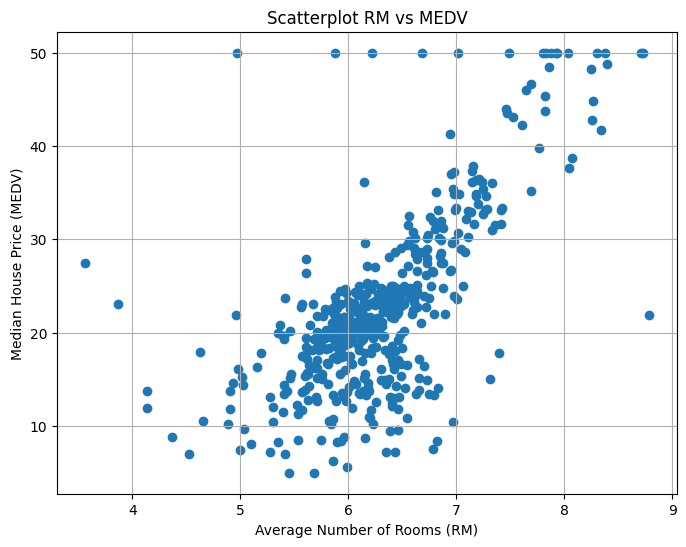

In [16]:
# Buat scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x='RM', y='MEDV', data=data)

# Tambahkan label dan judul
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median House Price (MEDV)')
plt.title('Scatterplot RM vs MEDV')
plt.grid(True)

# Tampilkan plot
plt.show()

Uji Hipotesis Korelasi

In [17]:
# Hitung koefisien korelasi Pearson dan p-value
korelasi_pearson, p_value = pearsonr(data['RM'], data ['MEDV'])

# Tetapkan tingkat signifikansi (alpha)
alpha = 0.05

print(f"Koefisien Korelasi Pearson: {korelasi_pearson:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Tingkat Signifikansi (alpha): {alpha}")

# Lakukan uji hipotesis
if p_value < alpha:
    keputusan = "Tolak Hipotesis Nol (H0)"
    interpretasi_uji = "Ada bukti statistik yang cukup untuk menyimpulkan adanya hubungan linier yang signifikan antara RM dan MEDV dalam populasi."
else:
    keputusan = "Gagal Menolak Hipotesis Nol (H0)"
    interpretasi_uji = "Tidak ada bukti statistik yang cukup untuk menyimpulkan adanya hubungan linier yang signifikan antarA RM dan MEDV dalam populasi."

print(f"\nKeputusan: {keputusan}")
print(f"Interpretasi Uji: {interpretasi_uji}")


Koefisien Korelasi Pearson: 0.695
P-value: 0.000
Tingkat Signifikansi (alpha): 0.05

Keputusan: Tolak Hipotesis Nol (H0)
Interpretasi Uji: Ada bukti statistik yang cukup untuk menyimpulkan adanya hubungan linier yang signifikan antara RM dan MEDV dalam populasi.


Interpretasi mendalam

*   Hubungan antara rata rata jumlah kamar (RM) dan median harga rumah (MEDV) bersifat positif, yang berarti semakin banyak kamar, harga rumah semakin tinggi.
*   Kekuatan Hubungan RM dan MEDV yaitu r ≈ 0.69, menunjukkan hubungan yang kuat karena berada pada rentang 0.60–0.79.
*   Karena p value < 0.05, maka H0 ditolak dan hubungan tersebut signifikan secara statistik
*   Jumlah kamar merupakan indikator ukuran dan kenyamanan rumah, sehingga wajar jika berkorelasi positif dengan harga. Semakin besar ukuran rumah (lebih banyak kamar), semakin tinggi nilai jualnya.
*   Batasan (Korelasi ≠ Kausalitas) Menjelaskan bahwa: Korelasi tidak berarti sebab akibat, Bisa ada variabel lain, Pearson hanya mengukur hubungan linear. Meskipun ditemukan korelasi yang kuat antara jumlah kamar dan harga rumah, hasil ini tidak menunjukkan hubungan kausalitas. Harga rumah dipengaruhi oleh berbagai faktor lain, termasuk kondisi sosial ekonomi wilayah (LSTAT), kualitas pendidikan yang tercermin dari rasio murid-guru (PTRATIO), serta tingkat kriminalitas (CRIM).






